In [314]:
import sys
sys.path.append("..")
import torch
import random
import d2l.torch as d2l

tensor([1.1862, 0.4298]) tensor([5.0964])


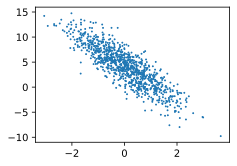

In [315]:
def synthetic_data(w, b, num_examples):

    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)

    return X, y.reshape(-1,1)

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print(features[0], labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [316]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

tensor([[ 1.8033,  0.2692],
        [ 0.4346, -0.7708],
        [ 0.0667, -1.6353],
        [ 0.7931, -0.3149],
        [-0.8120, -1.1672],
        [-0.5724,  1.6994],
        [-0.5142,  0.1431],
        [ 0.3726, -1.4157],
        [-0.0184,  0.4604],
        [ 0.0546,  0.2337]]) 
 tensor([[ 6.8983],
        [ 7.6782],
        [ 9.9022],
        [ 6.8587],
        [ 6.5393],
        [-2.7056],
        [ 2.6759],
        [ 9.7630],
        [ 2.5891],
        [ 3.5038]])


In [317]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print(w)
print(b)

tensor([[ 0.0055],
        [-0.0019]], requires_grad=True)
tensor([0.], requires_grad=True)


In [318]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [319]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [320]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [321]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):

    for X, y in data_iter(batch_size, features, labels):

        l = loss(net(X, w, b) , y)

        l.sum().backward()
        
        sgd([w, b], lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)

        print(f'epoch {epoch} , loss {train_l.mean():f}')


print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')



epoch 0 , loss 0.040852
epoch 1 , loss 0.000155
epoch 2 , loss 0.000054
w的估计误差：tensor([ 2.7966e-04, -3.2902e-05], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0005], grad_fn=<RsubBackward1>)
